In [48]:
# importing necessary packages
# doing this first line bc using juypter notebook in vscode
import numpy as np
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.widgets import CheckButtons
import pandas as pd
import scipy.stats as s_stats
import seaborn as sns
import mplcursors


In [32]:
sns.set_theme(context='notebook', style='darkgrid', palette='colorblind', 
              font='sans-serif', font_scale=1, color_codes=True, rc=None) 

In [37]:
raw_launch_data = pd.read_csv('launch-data/test-flight2/DATALOG.CSV')
clipped_launch_data = pd.read_csv('launch-data/test-flight2/clean_data.csv')

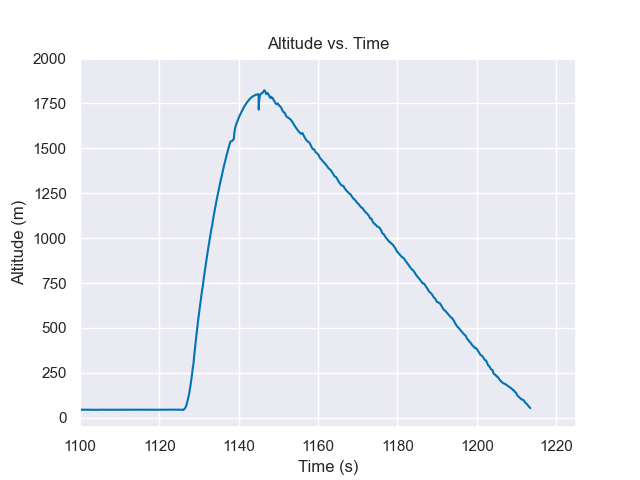

c:\Users\danie\miniconda3\envs\carm\lib\site-packages\mplcursors\_pick_info.py:142: UserWarning: Selection.target.index is deprecated and will be removed in the future; use Selection.index instead.
  warnings.warn(
c:\Users\danie\miniconda3\envs\carm\lib\site-packages\mplcursors\_pick_info.py:142: UserWarning: Selection.target.index is deprecated and will be removed in the future; use Selection.index instead.
  warnings.warn(


In [33]:
fig, ax = plt.subplots()
altvtime = plt.plot(raw_launch_data['time (ms)'] / 1000, raw_launch_data['altitude (m)'])
plt.xlim([1100, 1225])
# by default the tooltip is displayed "onclick"
# we can change it by setting hover to True
cursor = mplcursors.cursor(altvtime, hover=True)
# by default the annotation displays the xy positions
# this is to change it to the countries name
@cursor.connect("add")
def on_add(sel):
    index = sel.target.index
    x = sel.target[0]
    y = sel.target[1]
    sel.annotation.set(text=f'Altitude: {y:.2f} m')
    
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.title('Altitude vs. Time')
plt.show()

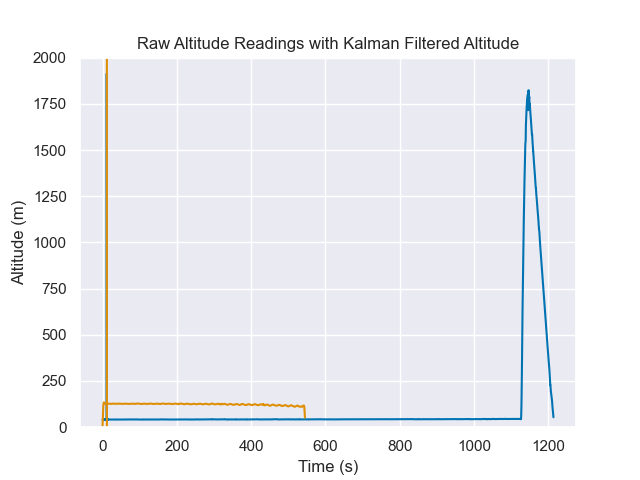

In [38]:
fig, ax = plt.subplots()
altvtime, = ax.plot(raw_launch_data['time (ms)'] / 1000, raw_launch_data['altitude (m)'], label="Raw Altitude")
kaltvtime, = ax.plot(raw_launch_data['time (ms)'] / 1000, raw_launch_data['kf altitude (m)'], label="Kalman Filtered Altitude")
# plt.xlim([1100, 1225])
plt.ylim([0, 2000])
# by default the tooltip is displayed "onclick"
# we can change it by setting hover to True
cursor = mplcursors.cursor([altvtime, kaltvtime], hover=True)

# by default the annotation displays the xy positions
# this is to change it to the countries name
@cursor.connect("add")
def on_add(sel):
    index = sel.target.index
    x = sel.target[0]
    y = sel.target[1]
    label = sel.artist.get_label()
    color = sel.artist.get_color()
    sel.annotation.set(text=f'{label}: {y}', bbox=dict(facecolor=color, alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))

plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.title('Raw Altitude Readings with Kalman Filtered Altitude')
plt.show()

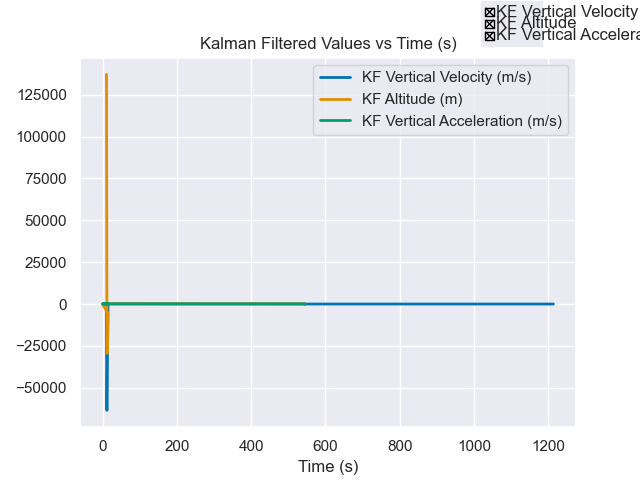

In [76]:
fig, ax = plt.subplots()
lines = []
lines.append(ax.plot(raw_launch_data['time (ms)'] / 1000, raw_launch_data['kf vertical velocity (m/s)'], visible=True, lw=2, label="KF Vertical Velocity (m/s)")[0])
lines.append(ax.plot(raw_launch_data['time (ms)'] / 1000, raw_launch_data['kf altitude (m)'], visible=True, lw=2, label="KF Altitude (m)")[0])
lines.append(ax.plot(raw_launch_data['time (ms)'] / 1000, raw_launch_data['kf vertical acceleration (m/s^2)'], visible=True, lw=2, label="KF Vertical Acceleration (m/s)")[0])

# Create check buttons to toggle lines
rax = plt.axes([0.75, 0.9, 0.1, 0.1]) 
labels = ['KF Vertical Velocity', 'KF Altitude', 'KF Vertical Acceleration']
visibility = [line.get_visible() for line in lines]
check = CheckButtons(rax, labels, visibility)

def toggle_lines(label):
    index = labels.index(label)
    lines[index].set_visible(not lines[index].get_visible())
    plt.draw()

check.on_clicked(toggle_lines)

ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('')
ax.set_title('Kalman Filtered Values vs Time (s)')
plt.show()

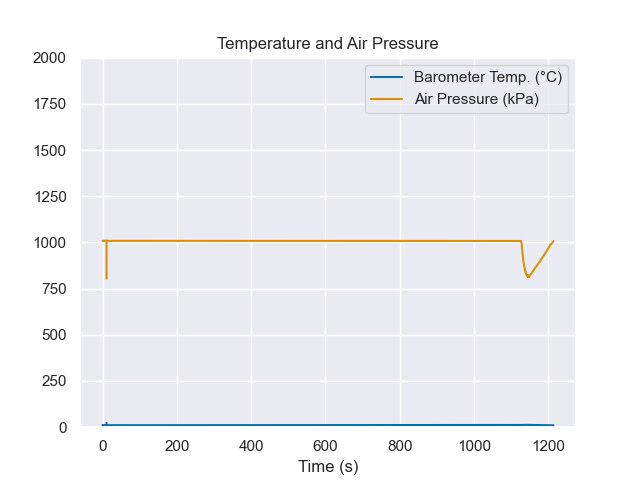

c:\Users\danie\miniconda3\envs\carm\lib\site-packages\mplcursors\_pick_info.py:142: UserWarning: Selection.target.index is deprecated and will be removed in the future; use Selection.index instead.
  warnings.warn(


In [77]:
fig, ax = plt.subplots()
altvtime, = ax.plot(raw_launch_data['time (ms)'] / 1000, raw_launch_data['barometer temp (C)'], label="Barometer Temp. (°C)")
kaltvtime, = ax.plot(raw_launch_data['time (ms)'] / 1000, raw_launch_data['air pressure (kPa)'], label="Air Pressure (kPa)")
# plt.xlim([1100, 1225])
plt.ylim([0, 2000])
# by default the tooltip is displayed "onclick"
# we can change it by setting hover to True
cursor = mplcursors.cursor([altvtime, kaltvtime], hover=True)

# by default the annotation displays the xy positions
# this is to change it to the countries name
@cursor.connect("add")
def on_add(sel):
    index = sel.target.index
    x = sel.target[0]
    y = sel.target[1]
    label = sel.artist.get_label()
    color = sel.artist.get_color()
    sel.annotation.set(text=f'{label}: {y}', bbox=dict(facecolor=color, alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))

# Add legend
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('')
ax.set_title('Temperature and Air Pressure')
plt.show()